# Prediction using Supervised ML
Linear regression task to predict the percentage of a student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/ day? 

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#reading data into pandas dataframe
df = pd.read_csv('http://bit.ly/w-data')
df.head() #prints first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


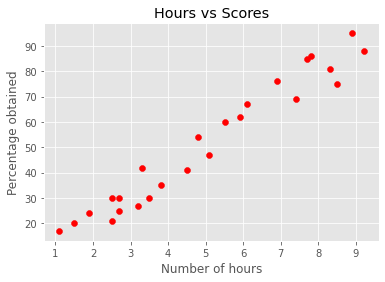

In [3]:
# plotting a scatter plot to get an idea about the data points

plt.scatter(df['Hours'], df['Scores'], c='red' )
plt.title('Hours vs Scores')
plt.xlabel('Number of hours')
plt.ylabel('Percentage obtained')
plt.show()

In [4]:
#split the data into features(X) and labels/target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, 1]

In [5]:
#split the data into traib and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True, random_state=42) 

In [6]:
#training the model

reg = LinearRegression() #linear regression object
reg.fit(X_train, y_train)

LinearRegression()

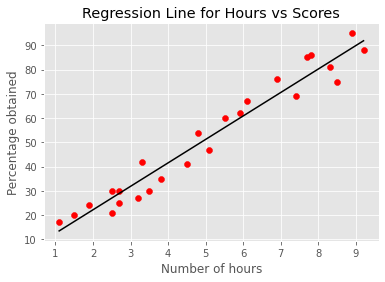

In [7]:
#plotting the regression line

prediction_space = np.linspace(np.min(X_train), np.max(X_train))

plt.plot(prediction_space, reg.predict(prediction_space) , color='black')
plt.scatter(df['Hours'], df['Scores'], c='red' )
plt.title('Regression Line for Hours vs Scores')
plt.xlabel('Number of hours')
plt.ylabel('Percentage obtained')

plt.show()

In [14]:
# making predictions and comparing actual vs predicted data
test_df = pd.DataFrame()
test_df['Actual'] = y_test
test_df['Predicted'] = reg.predict(X_test)
test_df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [15]:
# to predict score for the student studying for 9.25 hours

print(' Predicted score obtained when student studies for 9.25 hours is {}'.format(reg.predict([[9.25]])))

 Predicted score obtained when student studies for 9.25 hours is [92.38611528]


In [16]:
# to find the accuracy of regression model

model_accuracy = reg.score(X_test, y_test) # accuracy of the mode
print('Accuracy of the linear regression model: {}'.format(model_accuracy))

Accuracy of the linear regression model: 0.9678055545167994


In [17]:
y_pred = reg.predict(X_test)
rmse = np.sqrt( mean_squared_error(y_test, y_pred))
print('Root mean square error: {}'.format(rmse)) # root mean squared error

Root mean square error: 4.352380006653288


# Cross validation
if you're computing R squared on your test set, the R squared returned is dependent on the way that you split up the data!

To combat this dependence on what is essentially an arbitrary split, we use a technique called cross-validation.

As we split the dataset into five folds, we call this process 5-fold cross validation. 

In [18]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg, X, y, cv =5) # 5-fold cross validation returns an array of cross_validation scores
cv_results

array([0.78626426, 0.97891923, 0.93182467, 0.96604831, 0.9273292 ])

In [19]:
np.mean(cv_results) # average of cross validation results

0.9180771341891049